# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading of data

In [2]:
file_path='onlinefoods.csv'
food_csv=pd.read_csv(file_path)
food_csv.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
food_csv=food_csv.drop('Unnamed: 12',axis=1)

In [4]:
food_csv.shape

(388, 12)

In [5]:
food_csv.size

4656

In [6]:
food_csv.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [7]:
food_csv.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
dtype: object

In [8]:
food_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [9]:
food_csv.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [10]:
food_csv.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive


### checking the missing values

In [11]:
food_csv.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

- here we dont have any null values in any of the column

## Separation of Numerical and Categorical

In [12]:
categorical_columns=[]
numerical_columns=[]
for i,j in dict(food_csv.dtypes).items():
    if j=='O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

In [13]:
categorical_columns

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback']

In [14]:
numerical_columns

['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

In [15]:
pd.DataFrame(categorical_columns,columns=["categorical_columns"])

,categorical_columns
0,Gender
1,Marital Status
2,Occupation
3,Monthly Income
4,Educational Qualifications
5,Output
6,Feedback


In [16]:
pd.DataFrame(numerical_columns,columns=["numerical_columns"])

,numerical_columns
0,Age
1,Family size
2,latitude
3,longitude
4,Pin code


#### working on categorical column

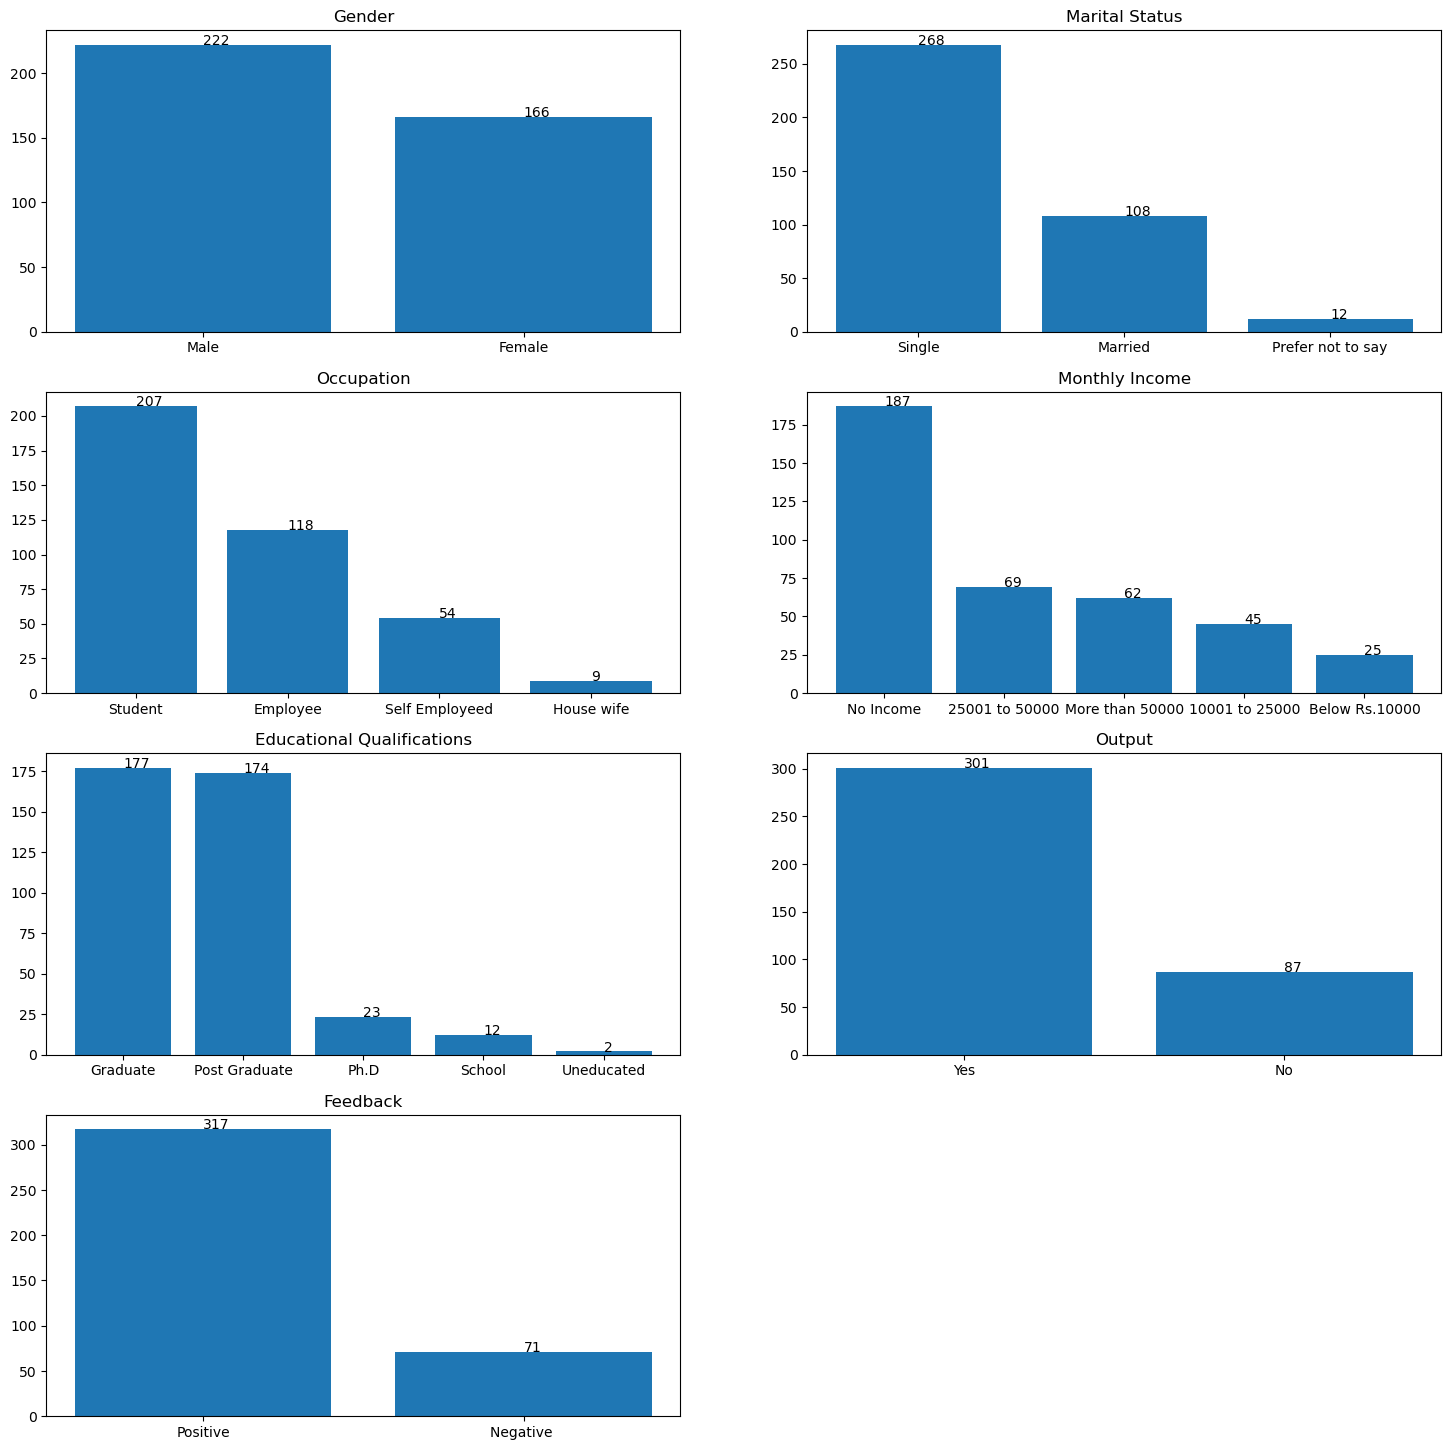

In [17]:
plt.figure(figsize=(18,18))
for index,i in enumerate(categorical_columns):
    plt.subplot(4,2,index+1)
    data=food_csv[i].value_counts()
    my_data=dict(data)
    keys=list(my_data.keys())
    value=list(my_data.values())
    k=pd.DataFrame(zip(keys,value),columns=["keys","values"])
    for i in range(len(keys)):
        plt.text(i,value[i],value[i])
    plt.title(categorical_columns[index])
    plt.bar("keys","values",data=k)
plt.show()

#### piechart

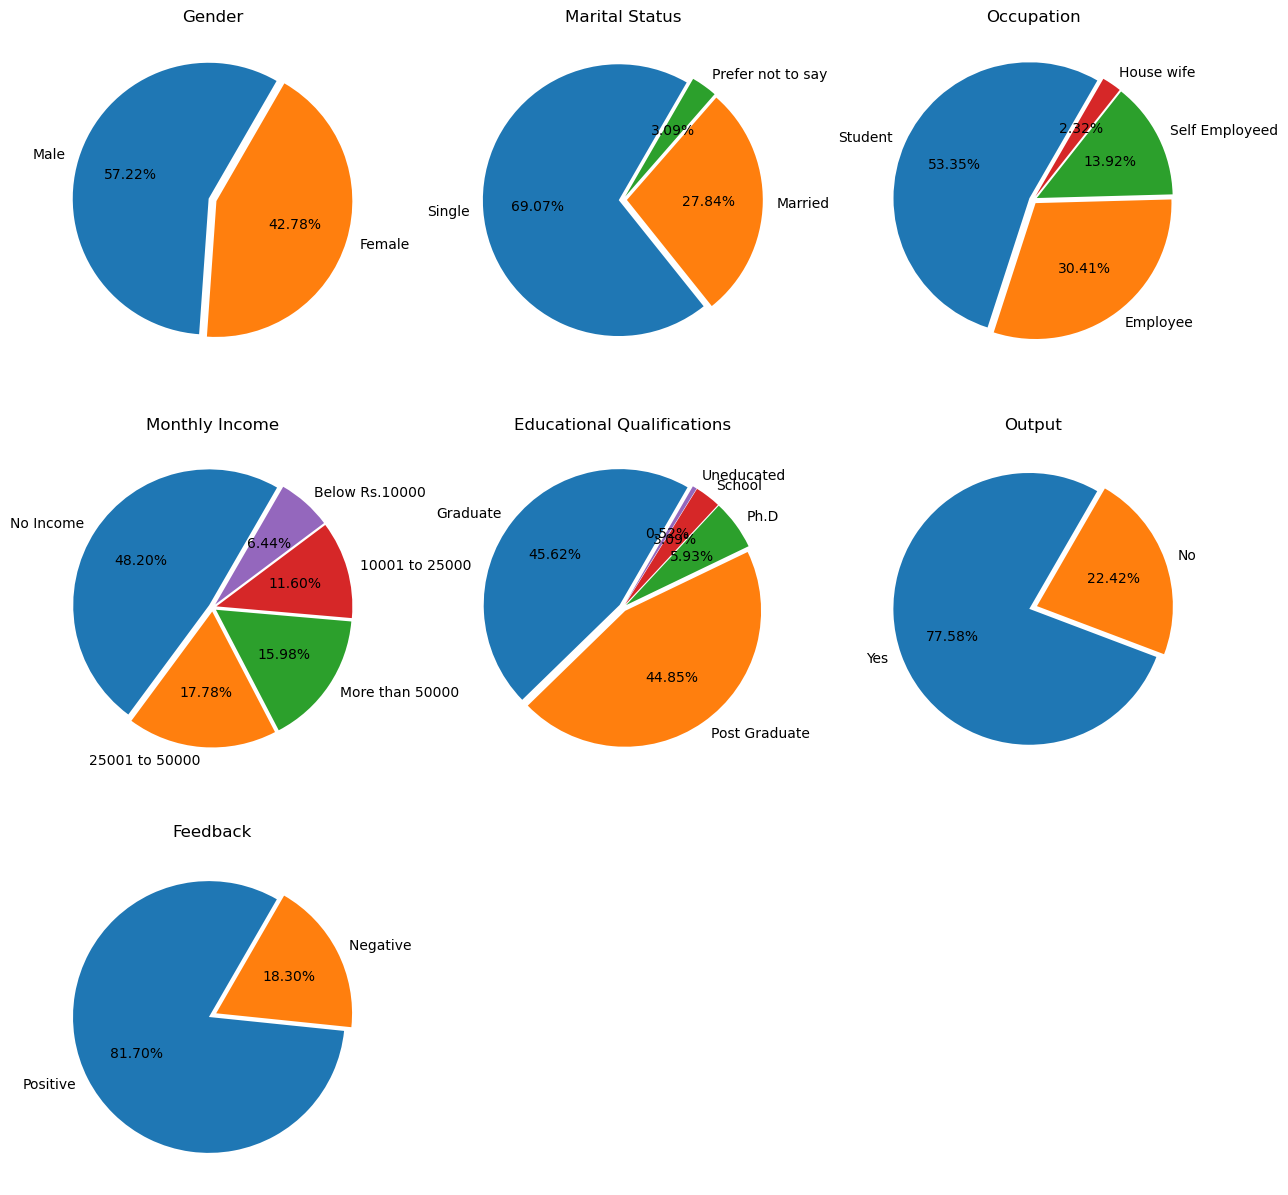

In [18]:
plt.figure(figsize=(15,15))
for index,i in enumerate(categorical_columns):
    plt.subplot(3,3,index+1)
    data=food_csv[i].value_counts()
    explode_data=[]
    my_data=dict(data)
    keys=list(my_data.keys())
    for i in keys:
        explode_data.append(0.03)
    value=list(my_data.values())
    k=pd.DataFrame(zip(keys,value),columns=["keys","values"])
    plt.title(categorical_columns[index])
    plt.pie(value,autopct="%.2f%%",labels=keys,startangle=60,explode=explode_data)
plt.show()
 


#### working on numerical column

In [19]:
food_csv.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


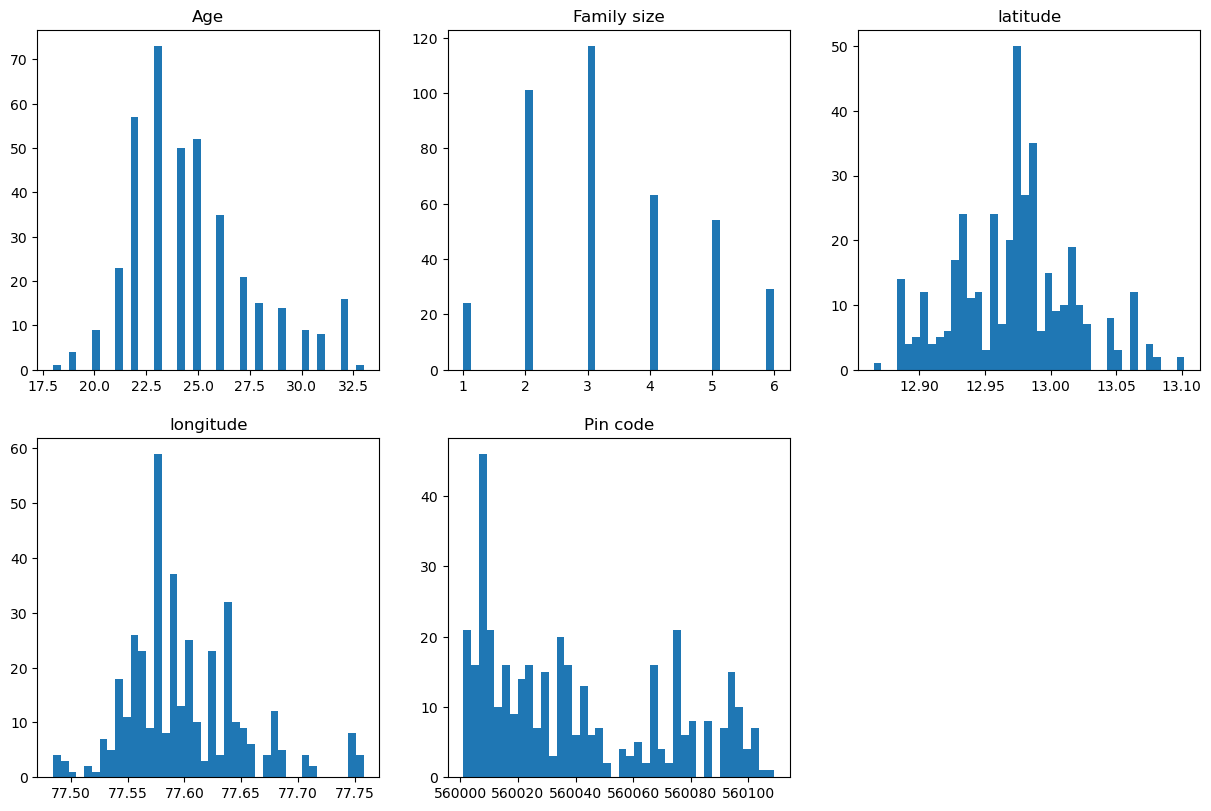

In [20]:
plt.figure(figsize=(15,15))
for index,i in enumerate(numerical_columns):   
    plt.subplot(3,3,index+1)
    plt.title(i)
    plt.hist(food_csv[i],bins=40)
    


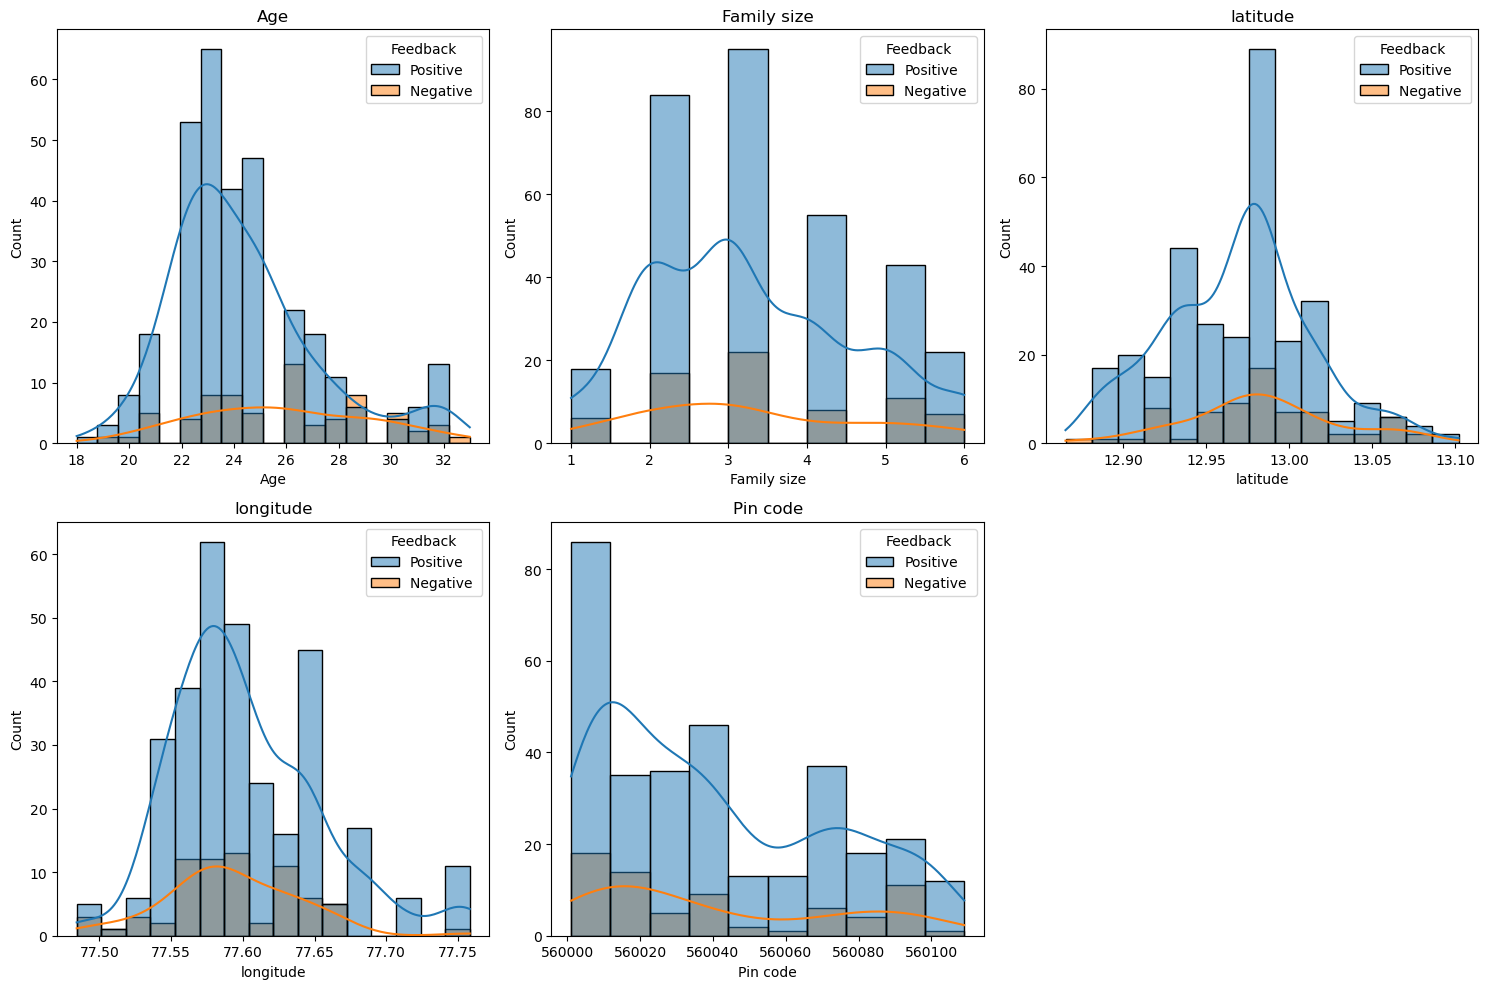

In [21]:
num_cols=len(numerical_columns)
num_rows=((num_cols)+1)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i,j in enumerate(numerical_columns):
    sns.histplot(data=food_csv, x=j, 
                 hue='Feedback', kde=True, ax=axs[i])
    axs[i].set_title(j)
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()


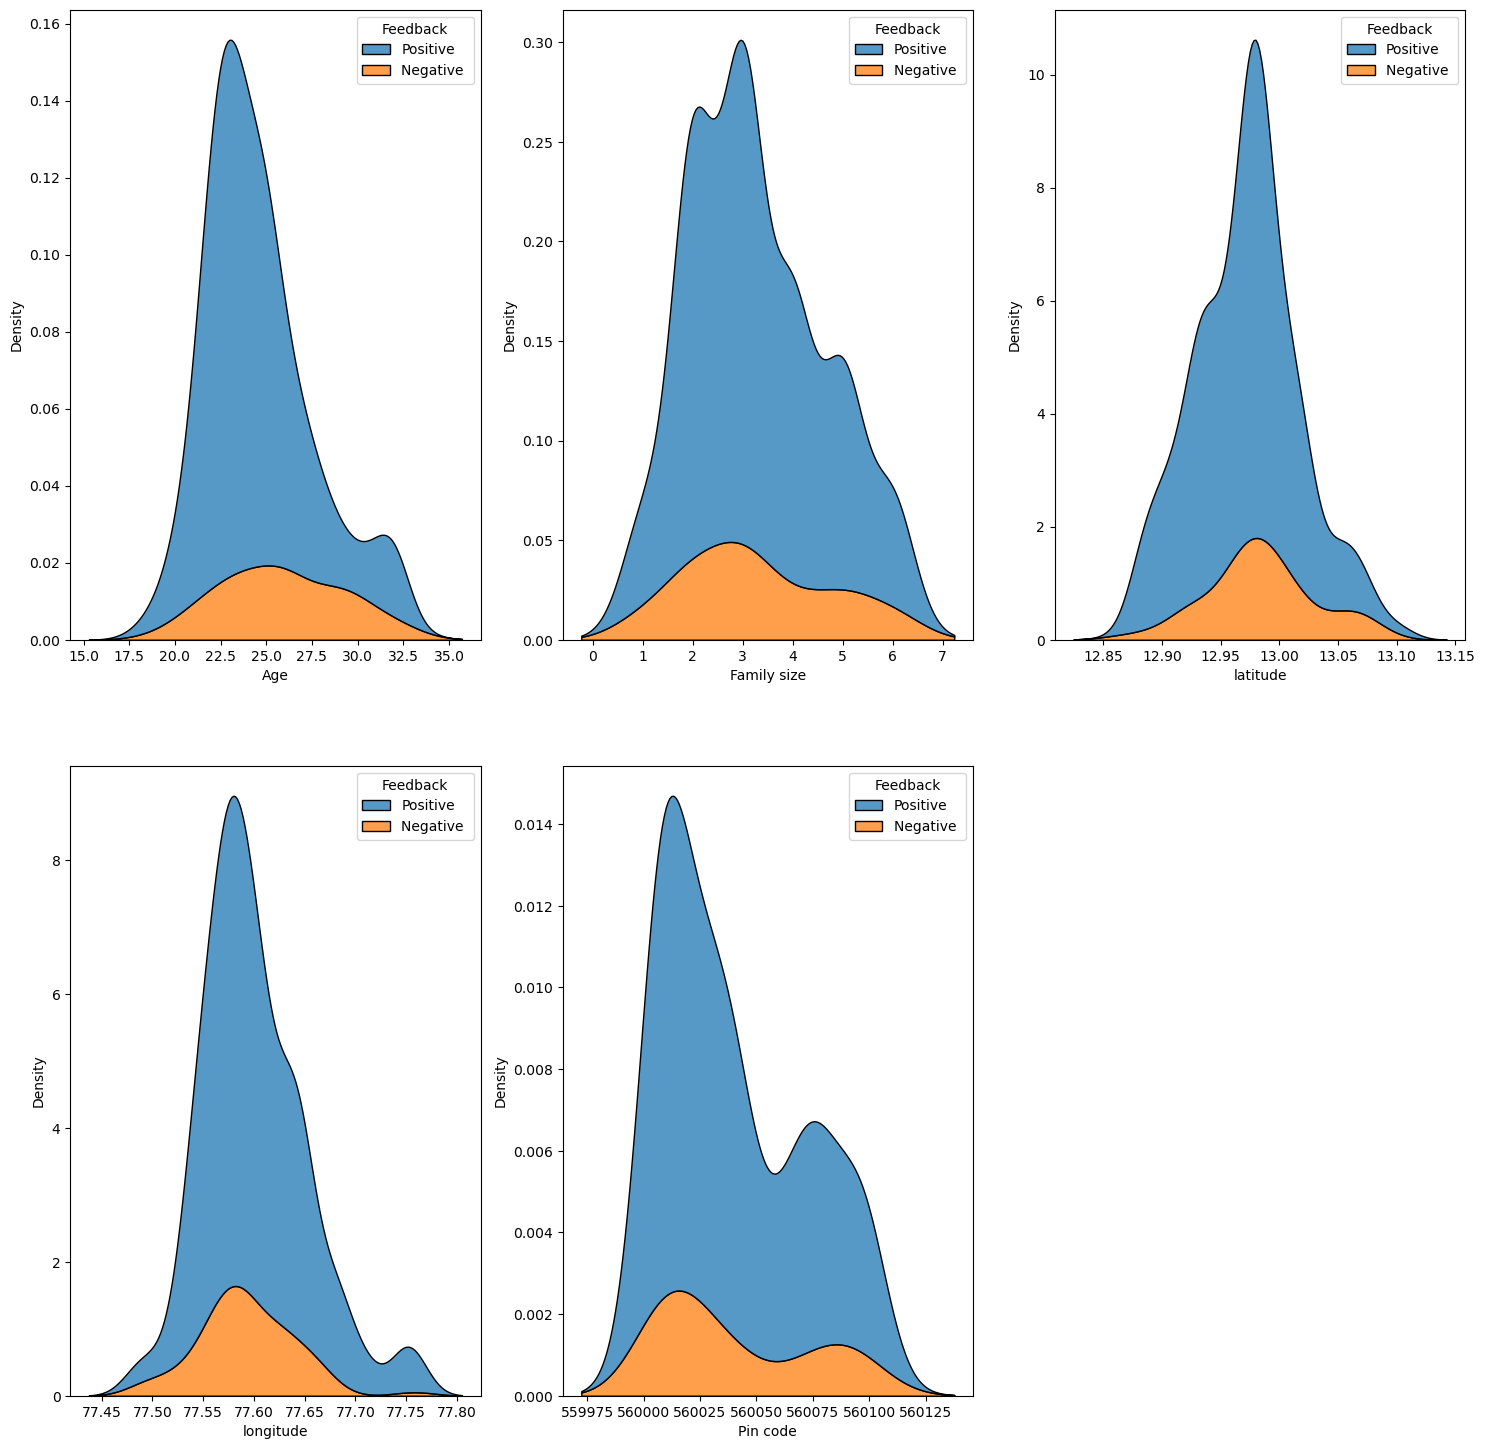

In [22]:
plt.figure(figsize=(18,18))
for index,i  in  enumerate(numerical_columns):
    plt.subplot(2,3,index+1)
    sns.kdeplot(data=food_csv, x=i, hue="Feedback", multiple="stack")

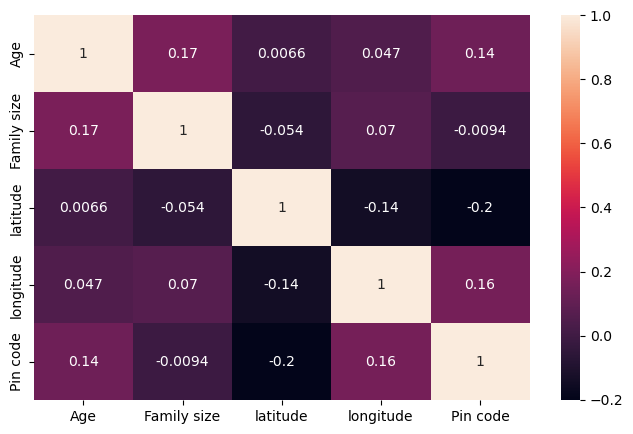

In [23]:
plt.figure(figsize=(8,5))
corr_data=food_csv.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

#### bivariate and multivariate anlaysis

In [24]:
categorical_columns

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback']

In [25]:
col1=food_csv['Gender']
col2=food_csv['Feedback']
for index,i in enumerate(categorical_columns[:5]):
    data=pd.crosstab(food_csv[i],col2)
    print(data)

Feedback  Negative   Positive
Gender                       
Female           27       139
Male             44       178
Feedback           Negative   Positive
Marital Status                        
Married                   31        77
Prefer not to say          5         7
Single                    35       233
Feedback        Negative   Positive
Occupation                         
Employee               33        85
House wife              1         8
Self Employeed         16        38
Student                21       186
Feedback         Negative   Positive
Monthly Income                      
10001 to 25000          10        35
25001 to 50000          21        48
Below Rs.10000          11        14
More than 50000         12        50
No Income               17       170
Feedback                    Negative   Positive
Educational Qualifications                     
Graduate                           42       135
Ph.D                                5        18
Post Graduate     

Feedback           Negative   Positive
Marital Status                        
Married                   31        77
Prefer not to say          5         7
Single                    35       233


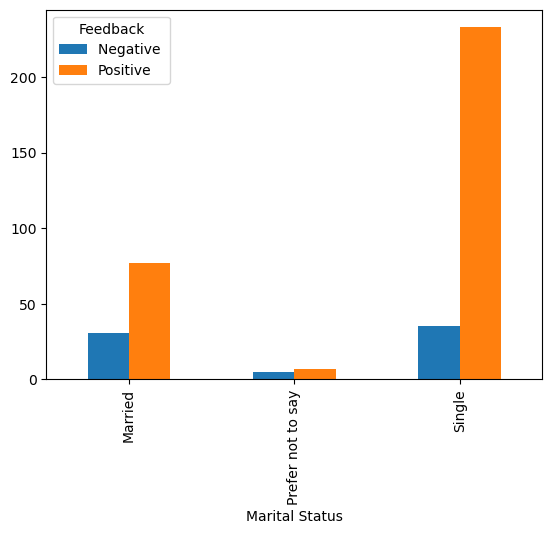

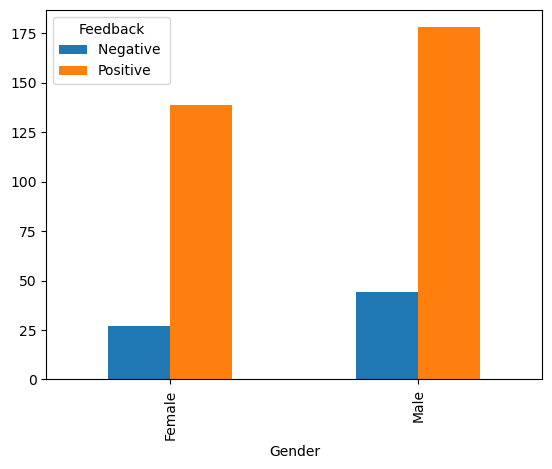

In [26]:
col1=food_csv['Marital Status']
col2=food_csv['Feedback']
data=pd.crosstab(col1,col2)
print(data)
data.plot(kind="bar")

col1=food_csv['Gender']
col2=food_csv['Feedback']
data=pd.crosstab(col1,col2)
data.plot(kind="bar")
plt.show()

Feedback        Negative   Positive
Occupation                         
Employee               33        85
House wife              1         8
Self Employeed         16        38
Student                21       186


<Axes: xlabel='Occupation'>

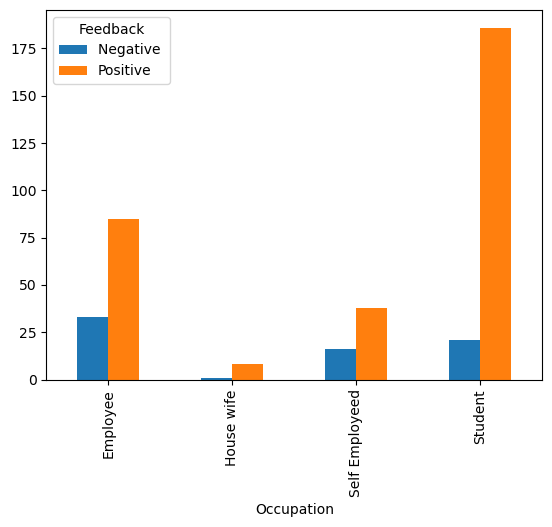

In [27]:
col1=food_csv['Occupation']
col2=food_csv['Feedback']
data=pd.crosstab(col1,col2)
print(data)
data.plot(kind="bar")

<Axes: xlabel='Occupation,Gender'>

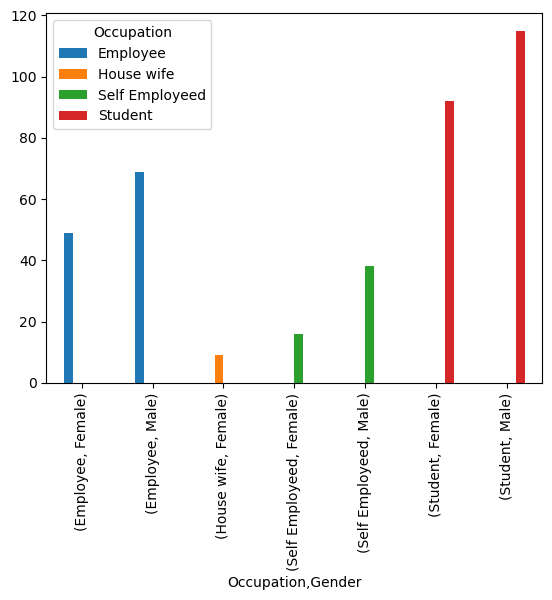

In [28]:
col1=food_csv['Gender']
col2=food_csv['Occupation']
col3=food_csv[ 'Feedback']
col11=[col2,col1]
data=pd.crosstab(col11,col2)

data.plot(kind="bar")

Occupation                      Employee  House wife  Self Employeed  Student
Occupation     Monthly Income                                                
Employee       10001 to 25000         23           0               0        0
               25001 to 50000         52           0               0        0
               Below Rs.10000          8           0               0        0
               More than 50000        35           0               0        0
House wife     No Income               0           9               0        0
Self Employeed 10001 to 25000          0           0              15        0
               25001 to 50000          0           0              14        0
               More than 50000         0           0              25        0
Student        10001 to 25000          0           0               0        7
               25001 to 50000          0           0               0        3
               Below Rs.10000          0           0            

<Axes: xlabel='Occupation,Monthly Income'>

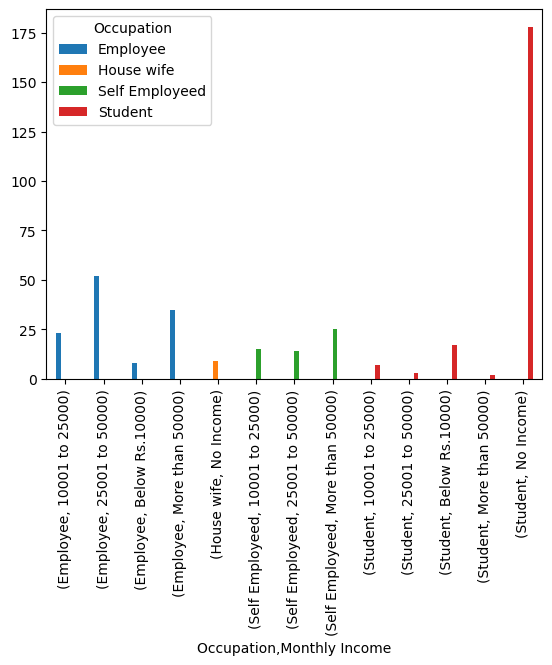

In [29]:
col1=food_csv['Monthly Income']
col2=food_csv['Occupation']
col3=food_csv[ 'Feedback']
col11=[col2,col1]
data=pd.crosstab(col11,col2)
print(data)
data.plot(kind="bar")

Occupation                             Employee  House wife  Self Employeed  \
Occupation     Monthly Income  Gender                                         
Employee       10001 to 25000  Female        10           0               0   
                               Male          13           0               0   
               25001 to 50000  Female        26           0               0   
                               Male          26           0               0   
               Below Rs.10000  Female         3           0               0   
                               Male           5           0               0   
               More than 50000 Female        10           0               0   
                               Male          25           0               0   
House wife     No Income       Female         0           9               0   
Self Employeed 10001 to 25000  Female         0           0               6   
                               Male           0     

<Axes: xlabel='Occupation,Monthly Income,Gender'>

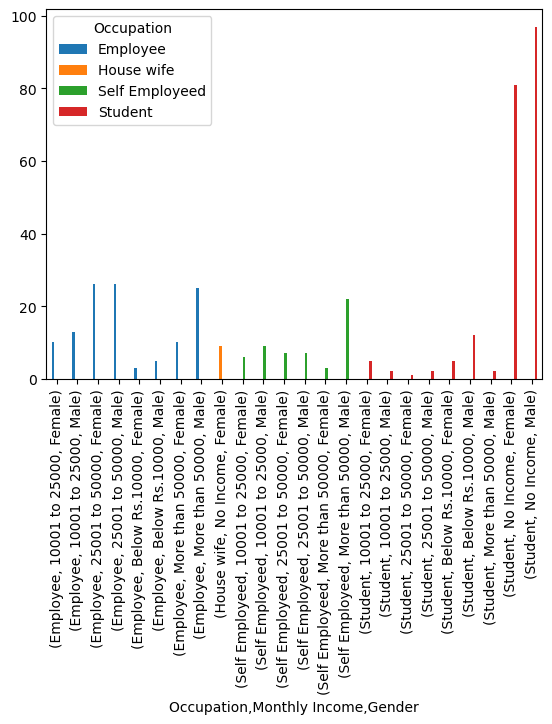

In [30]:
col1=food_csv['Monthly Income']
col2=food_csv['Occupation']
col21=food_csv['Gender']
col3=food_csv[ 'Feedback']
col11=[col2,col1,col21]
data=pd.crosstab(col11,col2)
print(data)
data.plot(kind="bar")

### converting the categorical columns into numerical columns

In [31]:
categorical_columns

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback']

In [32]:
cat_names_list=[]
for i in categorical_columns:
    items=food_csv[i].value_counts().keys()
    for k in items:
        cat_names_list.append(k)
cat_names_list

['Male',
 'Female',
 'Single',
 'Married',
 'Prefer not to say',
 'Student',
 'Employee',
 'Self Employeed',
 'House wife',
 'No Income',
 '25001 to 50000',
 'More than 50000',
 '10001 to 25000',
 'Below Rs.10000',
 'Graduate',
 'Post Graduate',
 'Ph.D',
 'School',
 'Uneducated',
 'Yes',
 'No',
 'Positive',
 'Negative ']

In [33]:
food_csv_cat=food_csv
food_csv_cat

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive


In [34]:
from sklearn.preprocessing import LabelEncoder
def preprocess(i):
    LE=LabelEncoder()
    food_csv[i]=LE.fit_transform(food_csv[i])
for i in categorical_columns:
    preprocess(i)

In [35]:
num_names_list=[]
for i in categorical_columns:
    items=food_csv[i].value_counts().keys()
    for k in items:
        num_names_list.append(k)
num_names_list

[1, 0, 2, 0, 1, 3, 0, 2, 1, 4, 1, 3, 0, 2, 0, 2, 1, 3, 4, 1, 0, 1, 0]

In [36]:
my_dictionary={}
for i in range(len(cat_names_list)):
    my_dictionary[cat_names_list[i].lower()]=num_names_list[i]
my_dictionary

{'male': 1,
 'female': 0,
 'single': 2,
 'married': 0,
 'prefer not to say': 1,
 'student': 3,
 'employee': 0,
 'self employeed': 2,
 'house wife': 1,
 'no income': 4,
 '25001 to 50000': 1,
 'more than 50000': 3,
 '10001 to 25000': 0,
 'below rs.10000': 2,
 'graduate': 0,
 'post graduate': 2,
 'ph.d': 1,
 'school': 3,
 'uneducated': 4,
 'yes': 1,
 'no': 0,
 'positive': 1,
 'negative ': 0}

In [37]:
def salary(my_sal):
    if my_sal<10000:
        return 2
    elif my_sal>=10001 and my_sal<=25000:
        return 0
    elif my_sal >=25001 and  my_data<=50000:
        return 1
    else:
        return 3
salary(20000)

0

### Feature selection

In [38]:
from sklearn.feature_selection import VarianceThreshold
VT=VarianceThreshold(threshold=0.3)
VT.fit(food_csv)

VarianceThreshold(threshold=0.3)

In [39]:
VT.get_support()

array([ True, False,  True,  True,  True,  True,  True, False, False,
        True, False, False])

In [40]:
food_csv.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [41]:
# from the above data  we can  remove the latitude and longitude
food_csv=food_csv.drop(['latitude', 'longitude'],axis=1)

In [42]:
food_csv

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,0,2,3,4,2,4,560001,1,1
1,24,0,2,3,2,0,3,560009,1,1
2,22,1,2,3,2,2,3,560017,1,0
3,22,0,2,3,4,0,6,560019,1,1
4,22,1,2,3,2,2,4,560010,1,1
...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,560001,1,1
384,23,0,2,3,4,2,4,560048,1,1
385,22,0,2,3,4,2,5,560010,1,1
386,23,1,2,3,2,2,2,560009,1,1


### Now getting of independent and dependent variable

In [43]:
X=food_csv.drop("Feedback",axis=1)
y=food_csv["Feedback"]

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_pred=RFC.predict(X_test)

In [47]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [48]:
y_test

271    0
46     1
167    1
42     1
349    0
      ..
3      1
18     0
93     1
108    1
255    1
Name: Feedback, Length: 78, dtype: int32

### metrix

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,roc_curve
acc_RF= round(accuracy_score(y_test,y_pred)*100,2)
f1_RF=round(f1_score(y_test,y_pred),2)
precision_RF=round(precision_score(y_test,y_pred),2)
recall_RF=round(recall_score(y_test,y_pred),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 88.46
F1 is: 0.93
Precision is: 0.93
Recall is: 0.94


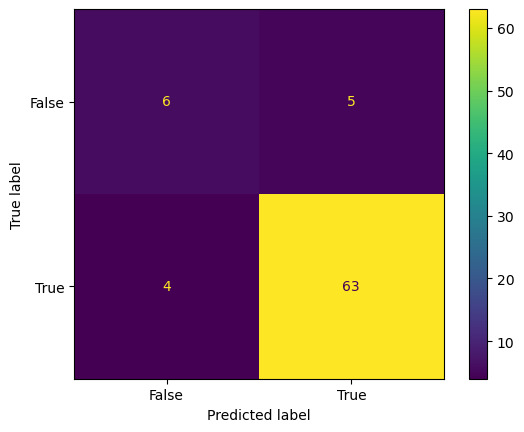

True negative: 6
False postive: 5
False negative: 4
True postive: 63


In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

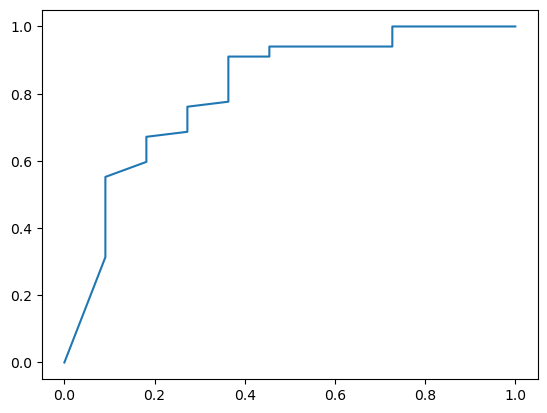

In [51]:
y_RF_pred_prob=RFC.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Hyperparameter tuning 

In [52]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()   
RF_params=[keys for keys in grid_RF.get_params()]

In [53]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [54]:
grid_search = GridSearchCV(grid_RF, 
                           param_grid,
                           scoring='accuracy', 
                           cv=5,
                          verbose=True)

In [55]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=True)

In [56]:
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

best params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best train accuracy: 0.8612903225806452


In [57]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier(max_depth=20,max_features='sqrt',n_estimators=50,min_samples_leaf=1,min_samples_split=2)
RFtree.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [58]:
y_pred_RF=RFtree.predict(X_test)

In [59]:
y_pred_RF

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 85.9
F1 is: 0.92
Precision is: 0.91
Recall is: 0.93


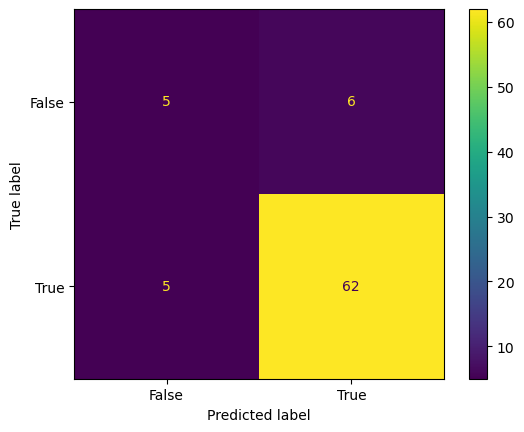

True negative: 5
False postive: 6
False negative: 5
True postive: 62


In [61]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

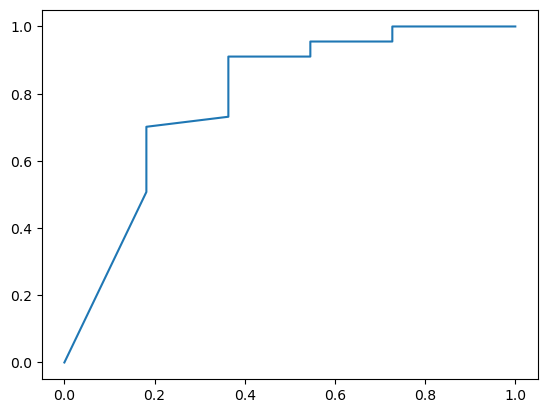

In [62]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [63]:
import pickle
pickle.dump(RFtree,
            open('food_delivery.pkl','wb'))

In [64]:
model = pickle.load(open('food_delivery.pkl','rb'))
model


RandomForestClassifier(max_depth=20, n_estimators=50)